Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# Replicating the lesson code
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline # command for jupyter notebooks to display plots inline

UsageError: unrecognized arguments: # command for jupyter notebooks to display plots inline


In [0]:
# setting the style, even though fast is the default
plt.style.use('fast')

In [5]:
# reading in the titanic dataframe
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'

titanic = pd.read_csv(url)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [7]:
# checking over how many passengers are in each class
titanic['Pclass'].value_counts()

3    355
1    184
2    173
Name: Pclass, dtype: int64

In [8]:
# cabin class is a categorical variable, converting from numeric value to string
titanic['cabin_class'] = titanic['Pclass'].map({1: 'first',
                                                2: 'second',
                                                3: 'third'})

titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
0,0,3,male,22.0,7.2500,Southampton,third
1,1,1,female,38.0,71.2833,Cherbourg,first
2,1,3,female,26.0,7.9250,Southampton,third
3,1,1,female,35.0,53.1000,Southampton,first
4,0,3,male,35.0,8.0500,Southampton,third


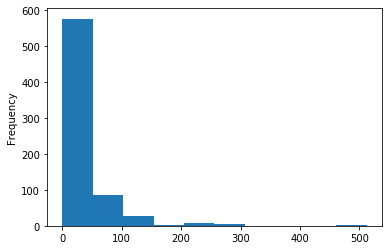

In [11]:
# fare is a continuous variable, let's plot it using a histogram
titanic['Fare'].plot(kind='hist');

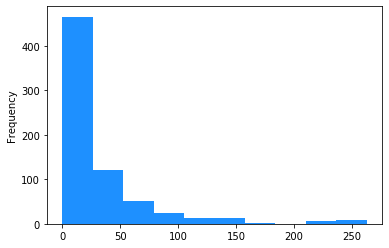

In [14]:
# removing the outliers
titanic = titanic[titanic['Fare']<500]

titanic['Fare'].plot(kind='hist', color='dodgerblue');

In [17]:
# a continuoous variable can be converted to a categorical variable
farebins = [0, 8, 15, 33, 512]
farelabels = ['low', 'medium', 'high', 'vhigh']

titanic['fare_groups'] = pd.cut(titanic['Fare'], bins=farebins, labels=farelabels)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class,fare_groups
0,0,3,male,22.0,7.2500,Southampton,third,low
1,1,1,female,38.0,71.2833,Cherbourg,first,vhigh
2,1,3,female,26.0,7.9250,Southampton,third,low
3,1,1,female,35.0,53.1000,Southampton,first,vhigh
4,0,3,male,35.0,8.0500,Southampton,third,medium


In [0]:
myresults = titanic['fare_groups'].value_counts().sort_index()

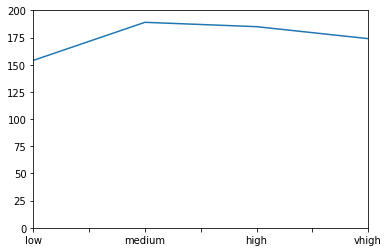

In [19]:
# plotting myresults with limits on y so that we have an axis that starts from 0
myresults.plot(ylim=(0, 200));

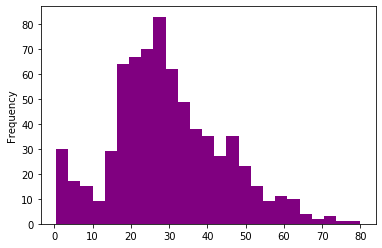

In [21]:
# histogram for a single continuous
titanic['Age'].plot(kind='hist', bins=25, color='purple');

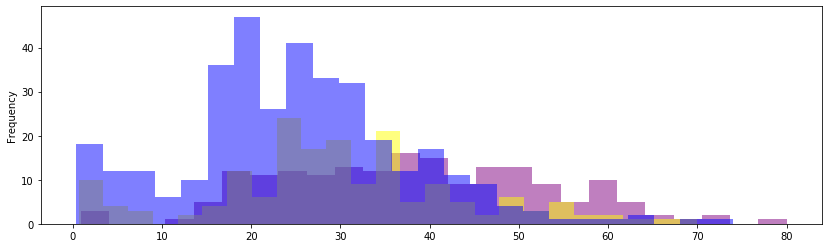

In [23]:
# stacked histogram
titanic[titanic['Pclass'] == 1]['Age'].plot(kind='hist', bins=25, alpha=0.5, figsize=(14, 4), color='purple')
titanic[titanic['Pclass'] == 2]['Age'].plot(kind='hist', bins=25, alpha=0.5, figsize=(14, 4), color='yellow')
titanic[titanic['Pclass'] == 3]['Age'].plot(kind='hist', bins=25, alpha=0.5, figsize=(14, 4), color='blue');

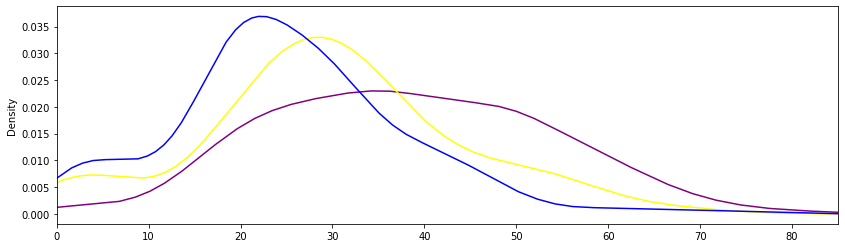

In [25]:
# using a KDE
titanic[titanic['Pclass']==1]['Age'].plot(kind='density', xlim=(0,85), figsize=(14, 4), color='purple')
titanic[titanic['Pclass']==2]['Age'].plot(kind='density', xlim=(0,85), figsize=(14, 4), color='yellow')
titanic[titanic['Pclass']==3]['Age'].plot(kind='density', xlim=(0,85), figsize=(14, 4), color='blue');

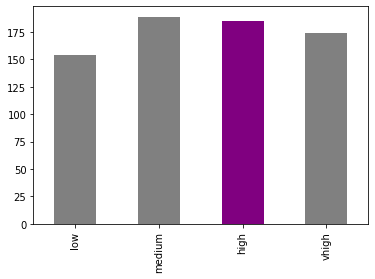

In [26]:
# bar chart manipulations
titanic['fare_groups'].value_counts().sort_index().plot(kind='bar', color=['grey', 'grey', 'purple', 'grey']);

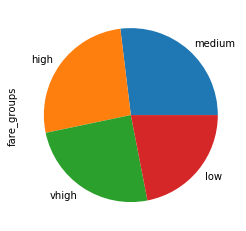

In [28]:
# Pie Chart
titanic['fare_groups'].value_counts().plot(kind='pie', figsize=(4, 4));

In [0]:
# Compare two categorical variables using crosstab
cab_survive = pd.crosstab(titanic['cabin_class'], titanic['Survived'])

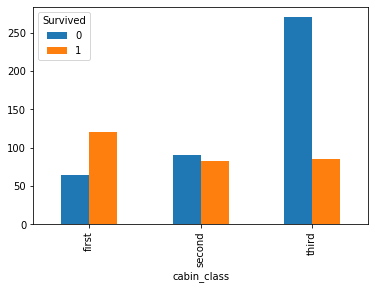

In [10]:
cab_survive.plot(kind='bar');

In [0]:
# Crosstab with column percents
cab_survive1 = pd.crosstab(titanic['cabin_class'], titanic['Survived'], normalize='columns')

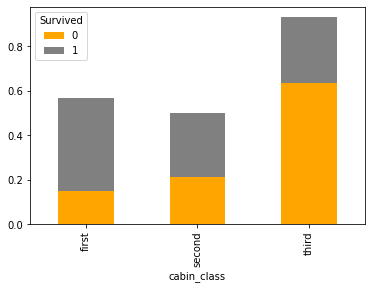

In [12]:
# Make a stacked bar chart for comparison of two categorical variables
cab_survive1.plot(kind='bar', stacked=True, color=['orange', 'gray']);

In [0]:
# Crosstab with column percents
cab_survive2 = pd.crosstab(titanic['cabin_class'], titanic['Survived'], normalize='index')

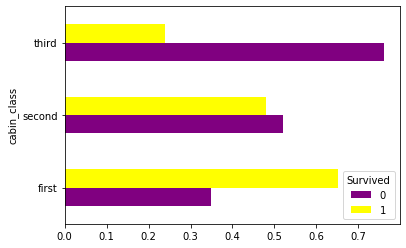

In [14]:
# A paired barchart for comparison of two categorical variables.
cab_survive2.plot(kind='barh', color=['purple', 'yellow']);

In [15]:
# Let's look at a single continuous variable
titanic['Age'].mean()

29.64209269662921

In [17]:
# Explore the continuous variable broken out by a categorical variable
cab_age = titanic.groupby('cabin_class')['Age'].mean()
cab_age

cabin_class
first     38.105543
second    29.877630
third     25.140620
Name: Age, dtype: float64

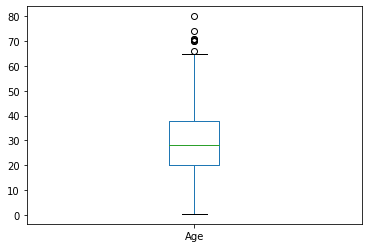

In [18]:
# To visualize a single continuous variable, you can just use .plot with kind=box
titanic['Age'].plot(kind='box');

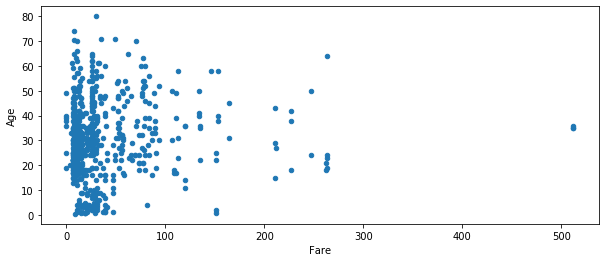

In [21]:
# Two continuous variables: age by fare
titanic.plot(kind='scatter', x='Fare', y='Age', figsize=(10,4));

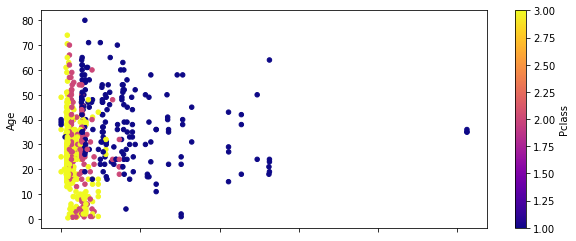

In [22]:
# Three variables: age, fare, and cabin class
titanic.plot(kind='scatter', x='Fare', y='Age', c='Pclass', colormap='plasma', figsize=(10,4));

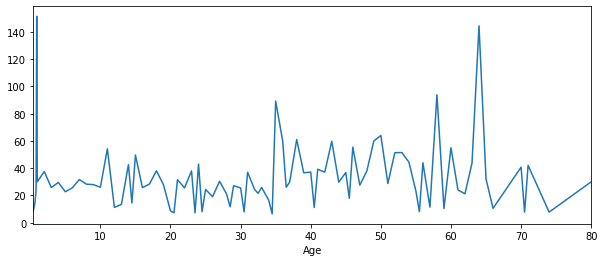

In [24]:
# line chart: age by fare
titanic.groupby('Age')['Fare'].mean().plot(kind='line', figsize=(10,4));

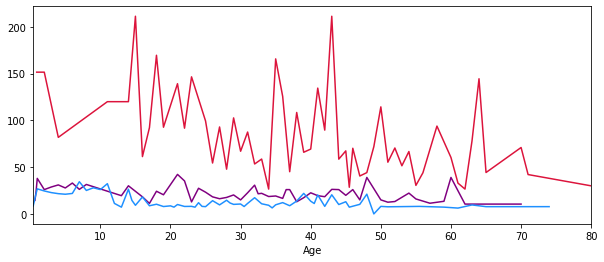

In [25]:
# Line chart: age by fare and cabin class
mycolors=['crimson', 'purple', 'dodgerblue']

# Loop through the values

for x in [1, 2, 3]:
  titanic[titanic['Pclass']==x].groupby('Age')['Fare'].mean().plot(color=mycolors[x-1], figsize=(10,4));

In [26]:
# Correlation Matrix
corr_matrix = titanic.corr()
corr_matrix

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.356462,-0.082446,0.266100
Pclass,-0.356462,1.000000,-0.365902,-0.552893
Age,-0.082446,-0.365902,1.000000,0.093143
Fare,0.266100,-0.552893,0.093143,1.000000


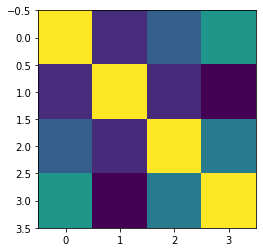

In [27]:
# Display the correlation matrix as a heatmap
plt.imshow(corr_matrix);

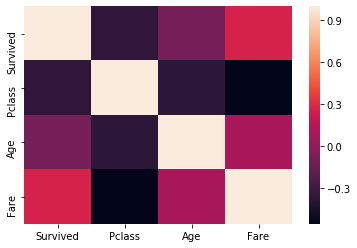

In [28]:
# With Seaborn
sns.heatmap(corr_matrix);

In [0]:
x=np.linspace(0, 5, 11)
y = x**2

In [31]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [32]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

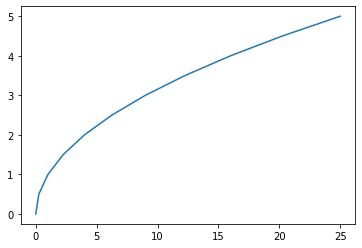

In [33]:
# simple plot to get started
plt.plot(y, x);

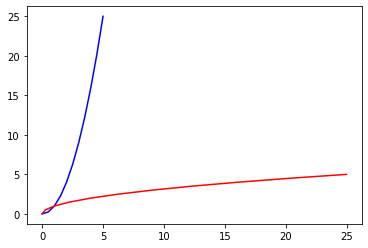

In [34]:
# two plt plots together

plt.plot(x, y, 'b')
plt.plot(y, x, 'r');

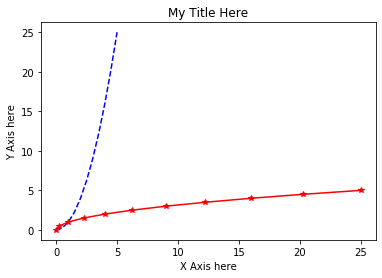

In [35]:
# Now add some labels, plus a little texture

plt.plot(x, y, 'b--')
plt.plot(y, x, 'r*-')
plt.xlabel('X Axis here')
plt.ylabel('Y Axis here')
plt.title('My Title Here');

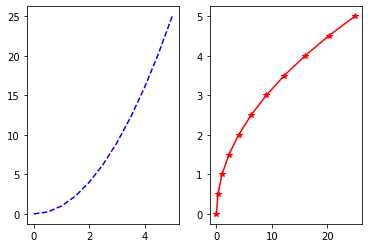

In [36]:
# The basic syntax goes like this: plt.subplot(nrows, ncols, plot_number)

plt.subplot(1, 2, 1)
plt.plot(x, y, 'b--')

plt.subplot(1, 2, 2)
plt.plot(y, x, 'r*-');

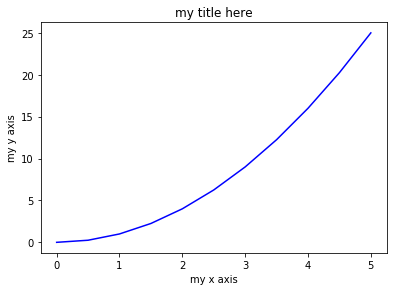

In [37]:
# Create Figure using .figure
fig = plt.figure()

# add the axes to figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# Plot on that set of axes
axes.plot(x, y, 'b')
axes.set_xlabel('my x axis')
axes.set_ylabel('my y axis')
axes.set_title('my title here');

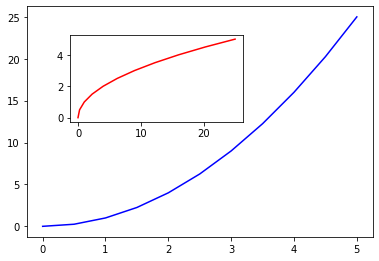

In [38]:
fig = plt.figure()
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]);

# Larger Figure Axes 1
axes1.plot(x, y, 'b')

# Insert Figure Axes 2
axes2.plot(y, x, 'r');

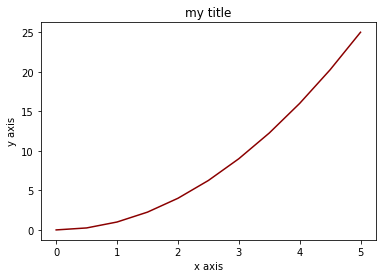

In [43]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots(nrows=1, ncols=1)

# Now use the axes object to add stuff to plot
axes.plot(x, y, 'darkred')
axes.set_xlabel('x axis')
axes.set_ylabel('y axis')
axes.set_title('my title');

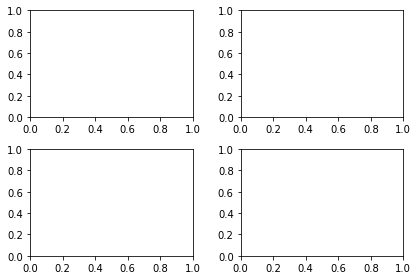

In [44]:
# Empty canvas of 1 by 2 subplots
fig, axes = plt.subplots(nrows=2, ncols=2)
# the parameter labesl 'nrows' and 'ncols' are optional
plt.tight_layout()

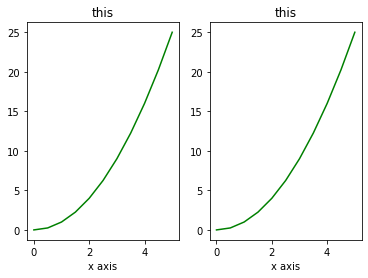

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
  ax.plot(x, y, 'g')
  ax.set_xlabel('x axis')
  ax.set_title('this');

<Figure size 800x400 with 0 Axes>

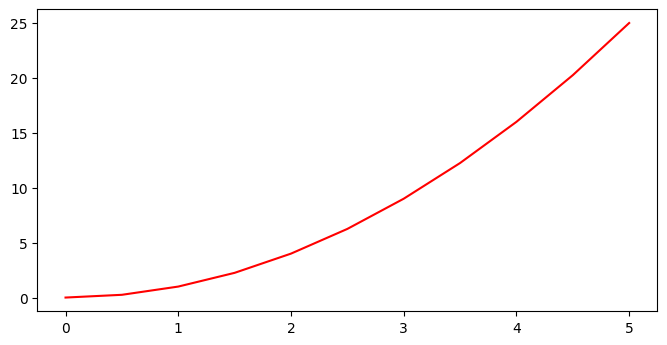

In [47]:
fig = plt.figure(figsize=(8,4), dpi=100)

fig, axes = plt.subplots(figsize=(8,4), dpi=100)
axes.plot(x, y, 'r');

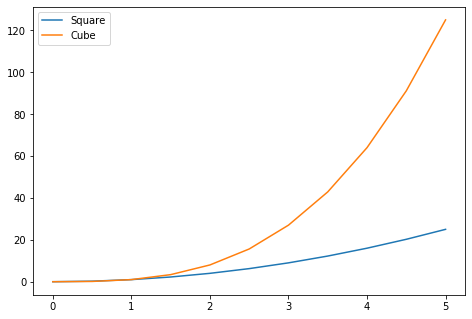

In [50]:
# labels

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(x, x**2, label='Square')
ax.plot(x, x**3, label='Cube')
ax.legend(loc=2);

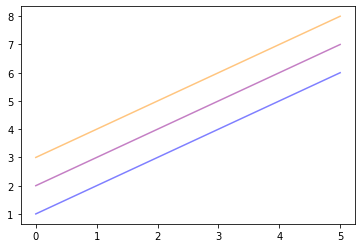

In [51]:
fig, ax = plt.subplots()

# half-transparent
ax.plot(x, x+1, color='blue', alpha=0.5)

# RGB hex code
ax.plot(x, x+2, color='#8B008B', alpha=0.5)

#RGB hex code
ax.plot(x, x+3, color='#FF8C00', alpha=0.5);

Text(0.5, 1.0, 'Custom Axes Range')

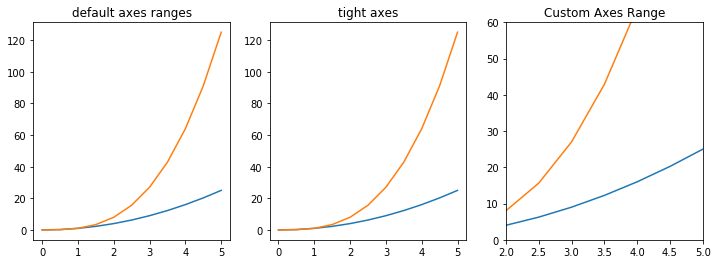

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title('default axes ranges')

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title('tight axes')

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title('Custom Axes Range')

In [54]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

In [0]:
# setting the style to 538

plt.style.use('fivethirtyeight')

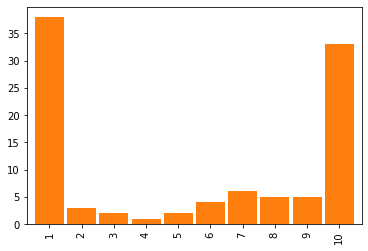

In [55]:
# create fake data to replicate the figure
fakelist = [38, 3, 2, 1, 2, 4, 6, 5, 5, 33]

fake = pd.Series(fakelist, index=range(1, 11))
fake.plot.bar(color='C1', width=0.9);

In [0]:
fakelist2=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

In [0]:
fake2 = pd.Series(fakelist2)

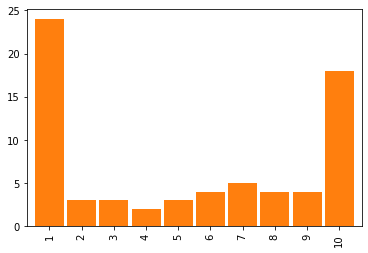

In [60]:
fake2.value_counts().sort_index().plot(kind='bar', color='C1', width=0.9);

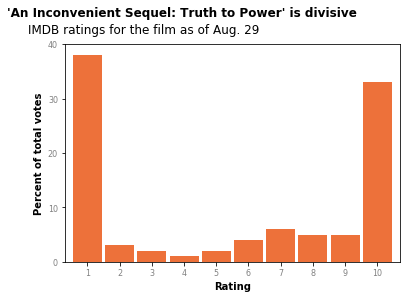

In [64]:
fig, ax = plt.subplots()
fig.patch.set(facecolor='white') # background color

# Set the bars
fake.plot.bar(width=0.9, color='#ED713A')

ax.set(facecolor='white')

# set title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth to Power' is divisive",
             fontsize=12,
             x=.35,
             y=1.1,
             fontweight='bold')

ax.text(s="IMDB ratings for the film as of Aug. 29", fontsize=12, x=-1.85,
        y=42);

# x and y labels
ax.set_xlabel('Rating', fontsize=10, fontweight='bold')
ax.set_ylabel('Percent of total votes', fontsize=10, fontweight='bold')

# fix x and y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation=0, color='grey', fontsize=8)
ax.set_yticklabels(range(0,50,10), color='grey', fontsize=8)
ax.set_yticks(range(0,50,10));

In [65]:
# read the data from 538's github repo
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')
df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [0]:
# Convert timestamp strings to actual datetime objects
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [68]:
df.set_index('timestamp', inplace=True)

df.head()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [0]:
lastday = df['2017-8-29']

In [0]:
lastday_filtered = lastday[lastday['category']=='IMDb users']

In [72]:
lastday_filtered.tail()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 22:30:06.423181,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:40:06.233659,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:50:06.592571,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:00:05.829558,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [73]:
final = lastday_filtered.tail(1)
final.T

timestamp,2017-08-29 23:10:06.218251
respondents,2662
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.4
mean,5.6
median,7
1_votes,1021
2_votes,69
3_votes,38
4_votes,25


In [75]:
pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
              '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']

final[pct_columns].T

timestamp,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


In [76]:
plot_data = final[pct_columns].T
plot_data.index=range(1,11)
plot_data.columns=['percent']
plot_data

,percent
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


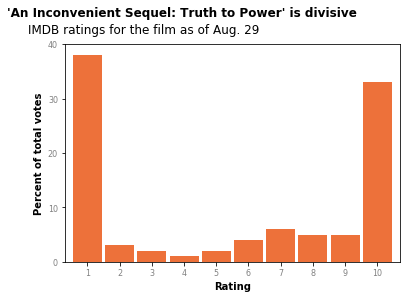

In [77]:
fig, ax = plt.subplots()
fig.patch.set(facecolor='white') # background color

# Set the bars
fake.plot.bar(width=0.9, color='#ED713A')

ax.set(facecolor='white')

# set title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth to Power' is divisive",
             fontsize=12,
             x=.35,
             y=1.1,
             fontweight='bold')

ax.text(s="IMDB ratings for the film as of Aug. 29", fontsize=12, x=-1.85,
        y=42);

# x and y labels
ax.set_xlabel('Rating', fontsize=10, fontweight='bold')
ax.set_ylabel('Percent of total votes', fontsize=10, fontweight='bold')

# fix x and y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation=0, color='grey', fontsize=8)
ax.set_yticklabels(range(0,50,10), color='grey', fontsize=8)
ax.set_yticks(range(0,50,10));

Picking a new chart to remake

In [93]:
# Replicating the 538 graph for How Baby Boomers Get High

from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2015/04/barry-jester-datalab-boomersdruguse-actual.png?w=575'
example = Image(url=url, width=400)

display(example)

In [95]:
# reading the data from github repo
drugs = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/drug-use-by-age/drug-use-by-age.csv')

drugs.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,-,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,0.1,2.0,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [98]:
drugs.dtypes # checking the data types in my dataframe

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

In [131]:
drugs_clean = drugs.drop(['alcohol-frequency', 'marijuana-frequency', 
                          'cocaine-frequency', 'crack-frequency', 
                          'heroin-frequency', 'hallucinogen-frequency',
                          'inhalant-frequency', 'pain-releiver-frequency',
                          'oxycontin-frequency', 'tranquilizer-frequency',
                          'stimulant-frequency', 'meth-frequency', 
                          'sedative-frequency', 'alcohol-use', 'n', 'age'],
                          axis=1)

drugs_clean.head(17)

,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
1,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
2,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2
3,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4
4,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2
5,28.0,2.0,0.1,0.1,4.8,2.0,8.5,1.4,3.5,2.8,0.6,0.5
6,33.7,3.2,0.4,0.4,7.0,1.8,9.2,1.7,4.9,3.0,0.5,0.4
7,33.4,4.1,0.5,0.5,8.6,1.4,9.4,1.5,4.2,3.3,0.4,0.3
8,34.0,4.9,0.6,0.9,7.4,1.5,10.0,1.7,5.4,4.0,0.9,0.5
9,33.0,4.8,0.5,0.6,6.3,1.4,9.0,1.3,3.9,4.1,0.6,0.3


In [166]:
sample = drugs_clean[15:16]
sample.dtypes

marijuana-use        float64
cocaine-use          float64
crack-use            float64
heroin-use           float64
hallucinogen-use     float64
inhalant-use         float64
pain-releiver-use    float64
oxycontin-use        float64
tranquilizer-use     float64
stimulant-use        float64
meth-use             float64
sedative-use         float64
dtype: object

In [183]:
sample.T.sort_values(by=15, ascending=False)

,15
marijuana-use,7.3
pain-releiver-use,2.5
tranquilizer-use,1.4
cocaine-use,0.9
crack-use,0.4
oxycontin-use,0.4
hallucinogen-use,0.3
stimulant-use,0.3
inhalant-use,0.2
meth-use,0.2


In [204]:
plot_data = sample.T.sort_values(by=15, ascending=True)
plot_data.index=['Heroin', 'Meth', 'Inhalant','Sedative', 'Hallucinogen', 
                 'Stimulant', 'OxyContin', 'Crack', 'Cocaine', 'Tranquilizer', 
                 'Pain Releiver', 'Marijuana']
plot_data.columns=['Percent']
plot_data

,Percent
Heroin,0.1
Meth,0.2
Inhalant,0.2
Sedative,0.2
Hallucinogen,0.3
Stimulant,0.3
OxyContin,0.4
Crack,0.4
Cocaine,0.9
Tranquilizer,1.4


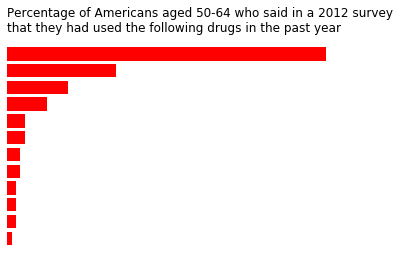

In [222]:
fig, ax = plt.subplots()

fig.patch.set(facecolor='white')

ax.barh(y=range(0, 12), width=plot_data['Percent'], color='red')

ax.set(facecolor='white')

ax.set_title('Percentage of Americans aged 50-64 who said in a 2012 survey'
              '\nthat they had used the following drugs in the past year', 
             fontsize=12, horizontalalignment='left', x=0);

plt.axis('off');

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here